In [1]:
import matplotlib.pyplot as plt
import numpy as np
pi = np.pi
from scipy.signal import argrelextrema
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
sns.set()

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)
%pylab inline

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


# Общее задание.

## Напишим функцию, которая будет реализовывать метод Рунге-Кутта 4-ого порядка

In [2]:
def f(u):
    return u

In [3]:
def rungekutt(dy, y, dt):
    k1 = f(y)
    k2 = f(y + dt*k1/2)
    k3 = f(y + dt*k2/2)
    k4 = f(y + dt*k3)
    dy = dy + (k1 + 2*k2 + 2*k3 + k4)*dt/6
    return dy

## Напишим функцию, которая будет реализовывать дрейф заряжанной частицы при различных условиях.

In [4]:
def gradient_drift(vx0, vy0=0, vz0=0, Bx0=0, By0=0, Bz0=0, Ex0=0, Ey0=0, Ez0=0, N=1000, n=2):
    m = 9.1e-31
    q = -1.6e-19
    omega = abs((q * Bz0)/(m))
    eps = 8.85e-12
    R1 = 0.05
    R2 = 0.02
    U = (q*np.log(R1/R2)/(2*pi*eps))
    t = 0
    t_list = []
    v_vector = np.array([vx0, vy0, vz0])
    B_vector = np.array([Bx0, By0, Bz0])
    T = 2*np.pi/omega
    dt = T/N
    coordinate = np.zeros(3)
    coor_array = []
    E = np.array([Ex0, Ey0, Ez0])
    Energie0 = m*(v_vector[0]**2 + v_vector[1]**2 + v_vector[2]**2)/2
    Energie = Energie0
    E_list = []
    while t < n*T:
        t_list.append(t)
        E_list.append(Energie)
        acceleration = (q*np.cross(v_vector, B_vector))/m + q*E/m
        v_vector = rungekutt(v_vector, acceleration, dt)
        coordinate = rungekutt(coordinate, v_vector, dt)
        coor_array.append(coordinate)
        Energie = m*(v_vector[0]**2 + v_vector[1]**2 + v_vector[2]**2)/2

        t+=dt
        
    return np.array(coor_array), np.array(t_list)/T, np.array(E_list), Energie0

# Случай №1. 

In [5]:
func = gradient_drift(Bz0=2, Ez0=0, Ex0=0, vy0=0, vx0=1e3, vz0=0, N=50000, n=2)

coordinate = func[0]
t = func[1]

Enegrie = func[2]/func[3]

## Начальные условия: 

### $B_{z0} = 2 Тл.,$

### $B_{y0} = 0 Тл.,$

### $B_{x0} = 0 Тл.,$

### $E_{x0} = 0 В/м.,$

### $E_{y0} = 0 В/м.,$

### $E_{z0} = 0 В/м.,$   
   
### $v_{x0} = 1000 м/c,$
   
### $v_{y0} = 0 м/c,$

### $v_{z0} = 0 м/c$

Text(0, 0.5, 'Энергия: E/$E_{0}$')

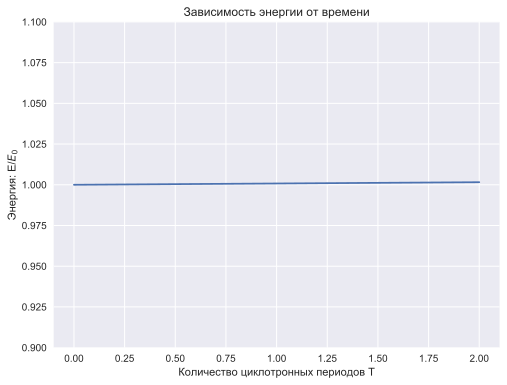

In [6]:
plt.figure(figsize=(8,6))

plt.plot(t, Enegrie)
plt.ylim(0.9, 1.1)
plt.title('Зависимость энергии от времени')
plt.xlabel('Количество циклотронных периодов T')
plt.ylabel('Энергия: E/$E_{0}$')

Text(0, 0.5, 'y, см')

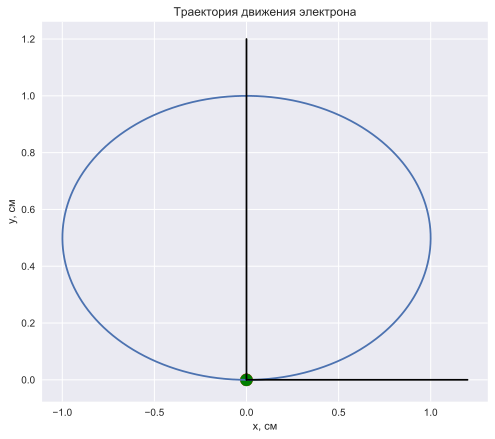

In [7]:
fig = plt.figure(figsize=(8,7))
x_lab = np.linspace(0, (coordinate.T[0]/max(coordinate.T[0], key=abs)).max()*1.2, 2)
y_lab = np.linspace(0, (coordinate.T[1]/max(coordinate.T[1], key=abs)).max()*1.2, 2)

plt.scatter(
    coordinate.T[0][0]/max(coordinate.T[0], key=abs),
    coordinate.T[1][0]/max(coordinate.T[1], key=abs),
    s=150, color='red'
)
plt.scatter(
    coordinate.T[0][-1]/max(coordinate.T[0], key=abs),
    coordinate.T[1][-1]/max(coordinate.T[1], key=abs),
    s=150, color='green'
)

plt.plot(coordinate.T[0]/max(coordinate.T[0], key=abs), coordinate.T[1]/max(coordinate.T[1], key=abs))
plt.plot(x_lab, [0]*len(x_lab),  color='black')
plt.plot([0]*len(y_lab), y_lab, color='black')

plt.title('Траектория движения электрона')
plt.xlabel('x, см')
plt.ylabel('y, см')

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

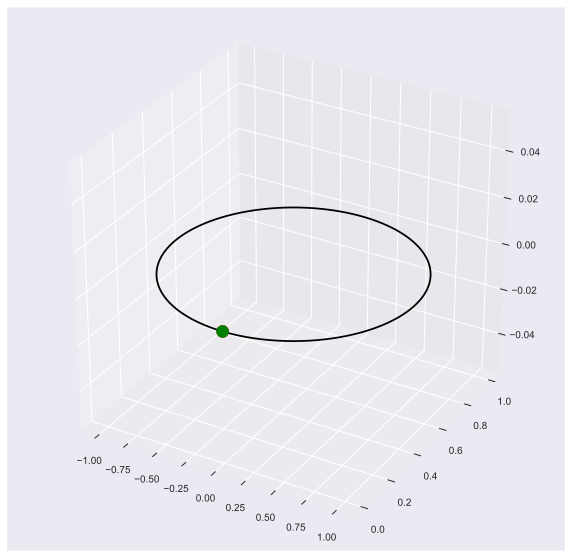

In [9]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

plt.scatter(
    coordinate.T[0][0]/max(coordinate.T[0], key=abs),
    coordinate.T[1][0]/max(coordinate.T[1], key=abs),
    s=150, color='red'
)
plt.scatter(
    coordinate.T[0][-1]/max(coordinate.T[0], key=abs),
    coordinate.T[1][-1]/max(coordinate.T[1], key=abs),
    s=150, color='green'
)

ax.plot3D(
    coordinate.T[0]/max(coordinate.T[0], key=abs),
    coordinate.T[1]/max(coordinate.T[1], key=abs),
    #coordinate.T[2]/(max(coordinate.T[2], key=abs)),
    'black')

# Случай №2. 

In [10]:
func = gradient_drift(Bz0=2, Ez0=0, Ex0=100, vy0=0, vx0=1e3, vz0=0, N=50000, n=2)

coordinate = func[0]
t = func[1]

Enegrie = func[2]/func[3]

## Начальные условия: 

### $B_{z0} = 2 Тл.,$

### $B_{y0} = 0 Тл.,$

### $B_{x0} = 0 Тл.,$

### $E_{x0} = 100 В/м.,$

### $E_{y0} = 0 В/м.,$

### $E_{z0} = 0 В/м.,$   
   
### $v_{x0} = 1000 м/c,$
   
### $v_{y0} = 0 м/c,$

### $v_{z0} = 0 м/c$

Text(0, 0.5, 'Энергия: E/$E_{0}$')

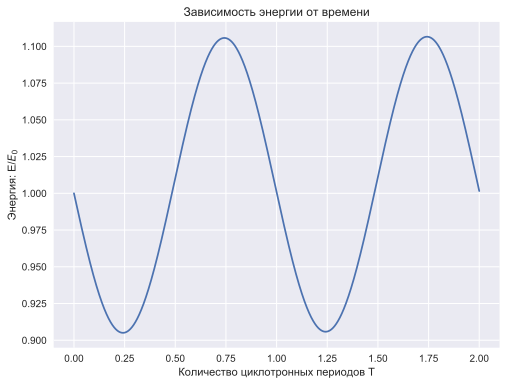

In [11]:
plt.figure(figsize=(8,6))
plt.plot(t, Enegrie)
plt.title('Зависимость энергии от времени')
plt.xlabel('Количество циклотронных периодов T')
plt.ylabel('Энергия: E/$E_{0}$')

Text(0, 0.5, 'y, см')

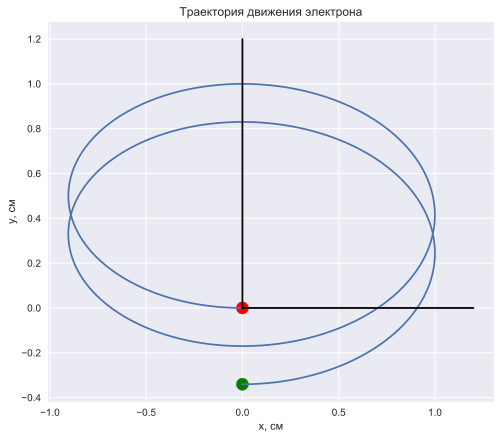

In [12]:
fig = plt.figure(figsize=(8,7))
x_lab = np.linspace(0, (coordinate.T[0]/max(coordinate.T[0], key=abs)).max()*1.2, 2)
y_lab = np.linspace(0, (coordinate.T[1]/max(coordinate.T[1], key=abs)).max()*1.2, 2)

plt.scatter(
    coordinate.T[0][0]/max(coordinate.T[0], key=abs),
    coordinate.T[1][0]/max(coordinate.T[1], key=abs),
    s=150, color='red'
)
plt.scatter(
    coordinate.T[0][-1]/max(coordinate.T[0], key=abs),
    coordinate.T[1][-1]/max(coordinate.T[1], key=abs),
    s=150, color='green'
)

plt.plot(coordinate.T[0]/max(coordinate.T[0], key=abs), coordinate.T[1]/max(coordinate.T[1], key=abs))
plt.plot(x_lab, [0]*len(x_lab),  color='black')
plt.plot([0]*len(y_lab), y_lab, color='black')

plt.title('Траектория движения электрона')
plt.xlabel('x, см')
plt.ylabel('y, см')

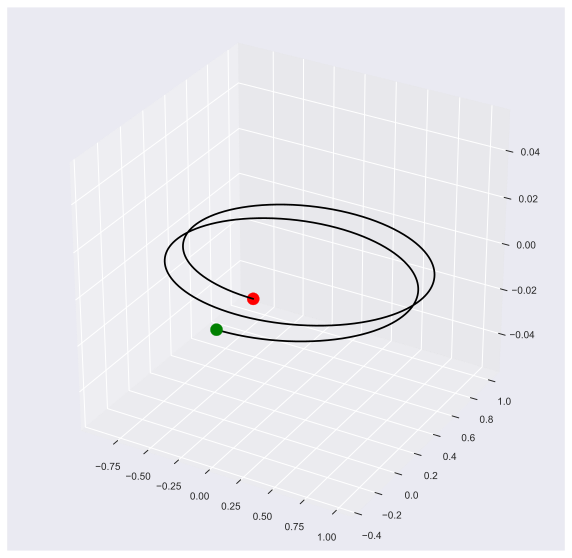

In [13]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

plt.scatter(
    coordinate.T[0][0]/max(coordinate.T[0], key=abs),
    coordinate.T[1][0]/max(coordinate.T[1], key=abs),
    s=150, color='red'
)
plt.scatter(
    coordinate.T[0][-1]/max(coordinate.T[0], key=abs),
    coordinate.T[1][-1]/max(coordinate.T[1], key=abs),
    s=150, color='green'
)

ax.plot3D(
    coordinate.T[0]/max(coordinate.T[0], key=abs),
    coordinate.T[1]/max(coordinate.T[1], key=abs),
    #coordinate.T[2]/(max(coordinate.T[2], key=abs)),
    'black')

# Случай №3. 

In [14]:
func = gradient_drift(Bz0=2, Bx0=1, By0=3, Ez0=100, Ex0=100, Ey0=200, vy0=1e3, vx0=1e3, vz0=2e3, N=50000, n=2)

coordinate = func[0]
t = func[1]

Enegrie = func[2]/func[3]

## Начальные условия: 

### $B_{z0} = 2 Тл.,$

### $B_{y0} = 3 Тл.,$

### $B_{x0} = 1 Тл.,$

### $E_{x0} = 100 В/м.,$

### $E_{y0} = 200 В/м.,$

### $E_{z0} = 100 В/м.,$   
   
### $v_{x0} = 1000 м/c,$
   
### $v_{y0} = 1000 м/c,$

### $v_{z0} = 2000 м/c$

Text(0, 0.5, 'Энергия: E/$E_{0}$')

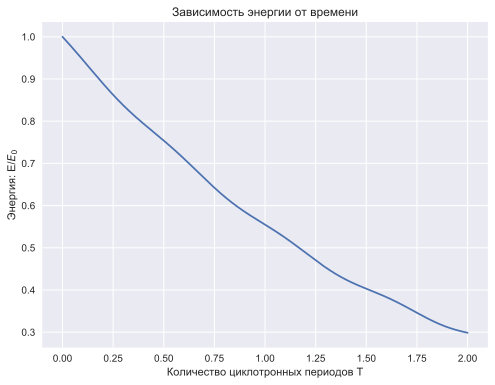

In [15]:
plt.figure(figsize=(8,6))

plt.plot(t, Enegrie)
plt.title('Зависимость энергии от времени')
plt.xlabel('Количество циклотронных периодов T')
plt.ylabel('Энергия: E/$E_{0}$')

Text(0, 0.5, 'y, см')

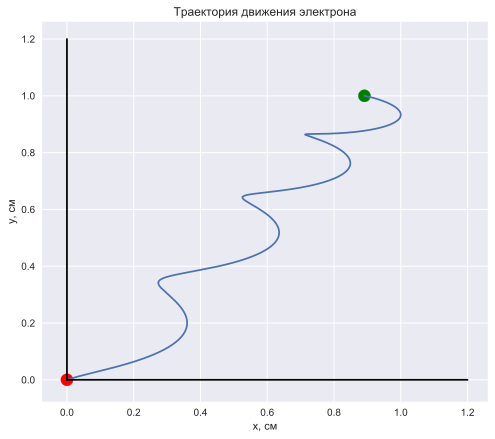

In [16]:
fig = plt.figure(figsize=(8,7))
x_lab = np.linspace(0, (coordinate.T[0]/max(coordinate.T[0], key=abs)).max()*1.2, 2)
y_lab = np.linspace(0, (coordinate.T[1]/max(coordinate.T[1], key=abs)).max()*1.2, 2)

plt.scatter(
    coordinate.T[0][0]/max(coordinate.T[0], key=abs),
    coordinate.T[1][0]/max(coordinate.T[1], key=abs),
    s=150, color='red'
)
plt.scatter(
    coordinate.T[0][-1]/max(coordinate.T[0], key=abs),
    coordinate.T[1][-1]/max(coordinate.T[1], key=abs),
    s=150, color='green'
)

plt.plot(coordinate.T[0]/max(coordinate.T[0], key=abs), coordinate.T[1]/max(coordinate.T[1], key=abs))
plt.plot(x_lab, [0]*len(x_lab),  color='black')
plt.plot([0]*len(y_lab), y_lab, color='black')

plt.title('Траектория движения электрона')
plt.xlabel('x, см')
plt.ylabel('y, см')

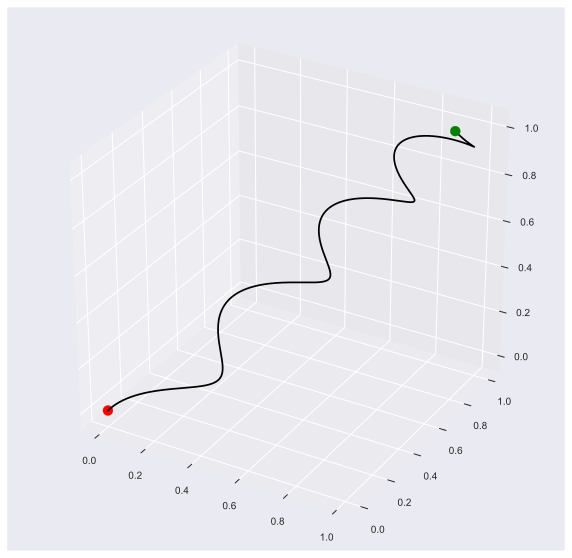

In [17]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter(
    coordinate.T[0][0]/max(coordinate.T[0], key=abs),
    coordinate.T[1][0]/max(coordinate.T[1], key=abs),
    coordinate.T[2][0]/max(coordinate.T[2], key=abs),
    c='r', marker='o', s=100
)
ax.scatter(
    coordinate.T[0][-1]/max(coordinate.T[0], key=abs),
    coordinate.T[1][-1]/max(coordinate.T[1], key=abs),
    coordinate.T[2][-1]/max(coordinate.T[2], key=abs),
    c='g', marker='o', s=100
)

ax.plot3D(
    coordinate.T[0]/max(coordinate.T[0], key=abs),
    coordinate.T[1]/max(coordinate.T[1], key=abs),
    coordinate.T[2]/(max(coordinate.T[2], key=abs)),
    'black')

# Индивидуальное задание. Вариант №14.

**Электрон находится в цилиндрическом конденсаторе. Однородное магнитное поле, направлено вдоль оси конденсатора. Внутренний радиус конденсатора равен 2 см, внешний радиус – 5 см.  =200 Гс – индукция магнитного поля. Изучить зависимость скорости дрейфа электрона от разности потенциалов U. Определить максимально возможную разность потенциалов и максимальную скорость электрона, при которых электрон может находиться внутри конденсатора. Выбор начальных величин координаты частицы и скорости оставляю на Ваше усмотрение.**

## Напишим функцию, которая будет реализовывать дрейф электрона в цилиндрическом конденсаторе.

In [18]:
def cilind_drift(vx0=10, vy0=0, vz0=0, N=1000, n=2, U=400, Bz0=0.02):
    m=9.1e-31
    q = -1.6e-19
    #Bz0 = 0.02
    omega = abs((q * Bz0)/(m))
    eps = 8.85e-12
    x0 = 0.03
    y0 = 0.03
    R1 = 0.05
    R2 = 0.02
    Q = (2*pi*eps*U)/np.log(R1/R2)
    t = 0
    t_list = []
    v_vector = np.array([vx0, vy0, vz0])
    B_vector = np.array([0, 0, Bz0])
    T = 2*np.pi/omega
    v = []
    dt = T/N
    coordinate = np.array([x0, y0, 0.5])
    coor_array = []
    E = np.array([0, 0, 0])
    Energie0 = m*(v_vector[0]**2 + v_vector[1]**2 + v_vector[2]**2)/2
    Energie = Energie0
    E_list = []
    V_grift = []
    V = []
    while t < n*T:
        V.append(v_vector)
        t_list.append(t)
        E_list.append(Energie)
        E[0] = Q*coordinate[0]/(2*pi*eps*(coordinate[0]**2+coordinate[1]**2)**(3/2))
        E[1] = Q*coordinate[1]/(2*pi*eps*(coordinate[0]**2+coordinate[1]**2)**(3/2))
        acceleration = (q*np.cross(v_vector, B_vector))/m + q*E/m
        v_vector = rungekutt(v_vector, acceleration, dt)
        coordinate = rungekutt(coordinate, v_vector, dt)
        coor_array.append(coordinate)
        Energie = m*(v_vector[0]**2 + v_vector[1]**2 + v_vector[2]**2)/2
        V_grift_ = (m*np.cross(acceleration, B_vector))/(q*np.dot(B_vector, B_vector))
        V_grift.append(V_grift_)
        t+=dt
#         if np.sqrt(coordinate[0]**2 + coordinate[1]**2) < 0.03:
#             print('Мы выпали на внутренний конденсатор')
#             break
            
#         if np.sqrt(coordinate[0]**2 + coordinate[1]**2) > 0.05:
#             print('Мы выпали на внешний конденсатор')
#             break
            
    return np.array(coor_array), np.array(t_list)/T, np.array(E_list), Energie0, E, V_grift, V

# Движение электрона в цилиндр. конденсаторе.

In [19]:
func = cilind_drift(vx0=0, vy0=0, n=15, U=350, N=50000, Bz0=0.02)

## Начальные условия: 
### $x_0 = 0.03 см.,$

### $y_0 = 0.03 см.,$
   
### $U = 350,$
   
### $v_{x0} = 0,$
   
### $v_{y0} = 0$

### $B_{z0} = 0.02$


### Количество периодов = 15.

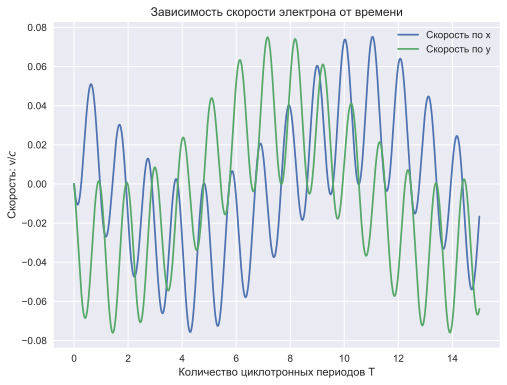

In [20]:
coordinate = func[0]
t = func[1]

Enegrie = func[2]/(9.1e-31 * (3e8)**2)

plt.figure(figsize=(8,6))
V = np.array(func[6])
plt.plot(t, V.T[0]/3e8)
plt.plot(t, V.T[1]/3e8)

plt.title('Зависимость скорости электрона от времени')
plt.xlabel('Количество циклотронных периодов T')
plt.ylabel('Cкорость: v/$c$')
plt.legend(['Скорость по х', 'Скорость по у'])

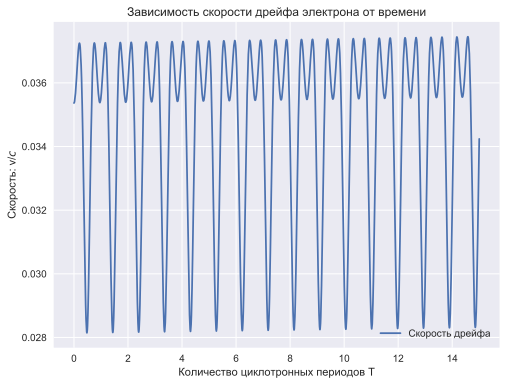

In [21]:
plt.figure(figsize=(8,6))

V_drift = np.array(func[5])
plt.plot(t, np.sqrt((V_drift.T[0]/3e8)**2+(V_drift.T[1]/3e8)**2))

plt.title('Зависимость скорости дрейфа электрона от времени')
plt.xlabel('Количество циклотронных периодов T')
plt.ylabel('Cкорость: v/$c$')
plt.legend(['Скорость дрейфа'], loc=4)

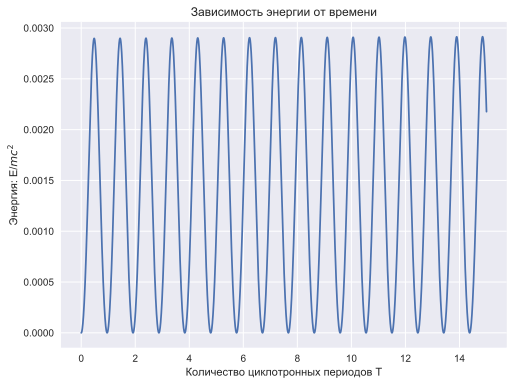

In [22]:
plt.figure(figsize=(8,6))
plt.title('Зависимость энергии от времени')
plt.xlabel('Количество циклотронных периодов T')
plt.ylabel('Энергия: E/$mc^2$')
plt.plot(t, Enegrie)

Text(0, 0.5, 'y, см')

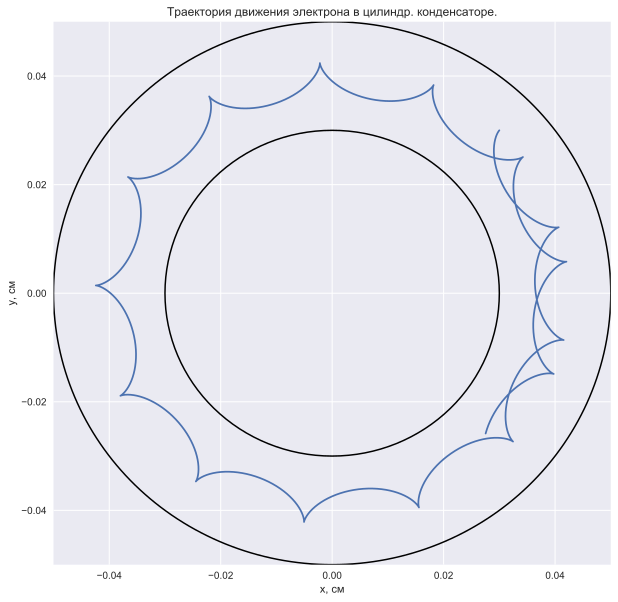

In [23]:
circle1 = plt.Circle((0, 0), 0.05, color='black', fill=False, linewidth=1.5)
circle2 = plt.Circle((0, 0), 0.03, color='black', fill=False, linewidth=1.5)

fig, ax = plt.subplots(figsize=(10, 10)) 

ax.add_artist(circle1)
ax.add_artist(circle2)

plt.plot(coordinate.T[0], coordinate.T[1])
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)

plt.title('Траектория движения электрона в цилиндр. конденсаторе.')
plt.xlabel('x, см')
plt.ylabel('y, см')

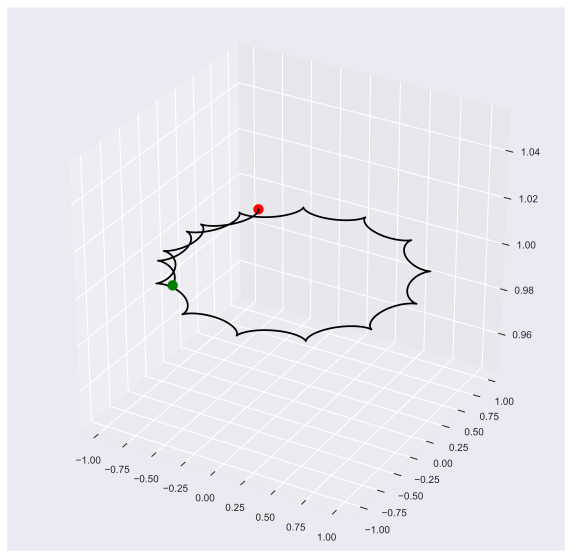

In [24]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter(
    coordinate.T[0][0]/max(coordinate.T[0], key=abs),
    coordinate.T[1][0]/max(coordinate.T[1], key=abs),
    coordinate.T[2][0]/max(coordinate.T[2], key=abs),
    c='r', marker='o', s=100
)
ax.scatter(
    coordinate.T[0][-1]/max(coordinate.T[0], key=abs),
    coordinate.T[1][-1]/max(coordinate.T[1], key=abs),
    coordinate.T[2][-1]/max(coordinate.T[2], key=abs),
    c='g', marker='o', s=100
)

ax.plot3D(
    coordinate.T[0]/max(coordinate.T[0], key=abs),
    coordinate.T[1]/max(coordinate.T[1], key=abs),
    coordinate.T[2]/(max(coordinate.T[2], key=abs)),
    'black')

## Рассмотрим предельный случай движения электрона, когда она еще не падает на обкладку конденсатора. 

In [25]:
func = cilind_drift(vx0=0, vy0=0, n=15, U=725, N=50000)

## Начальные условия: 
### $x_0 = 0.03 см.,$

### $y_0 = 0.03 см.,$
   
### $U = 725,$
   
### $v_{x0} = 0,$
   
### $v_{y0} = 0$

### Количество периодов = 15.

In [26]:
coordinate = func[0]
t = func[1]

Enegrie = func[2]/(9.1e-31 * (3e8)**2)

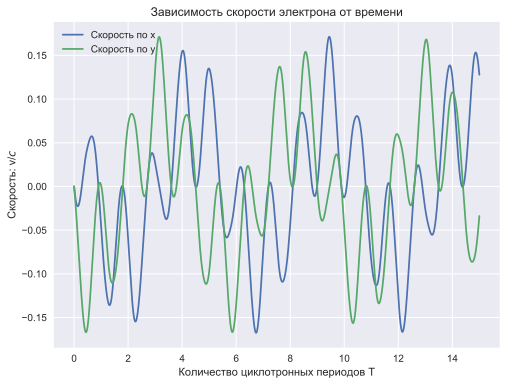

In [27]:
plt.figure(figsize=(8,6))
V = np.array(func[6])
plt.plot(t, V.T[0]/3e8)
plt.plot(t, V.T[1]/3e8)

plt.title('Зависимость скорости электрона от времени')
plt.xlabel('Количество циклотронных периодов T')
plt.ylabel('Cкорость: v/$c$')
plt.legend(['Скорость по х', 'Скорость по у'])

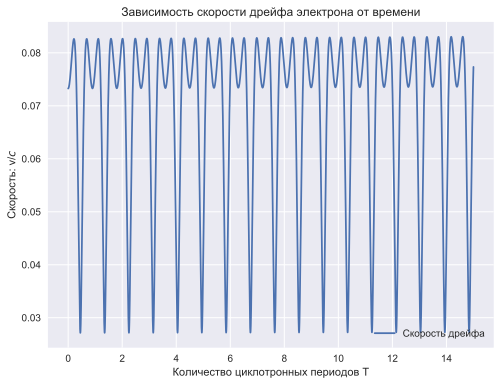

In [28]:
plt.figure(figsize=(8,6))
V_drift = np.array(func[5])
plt.plot(t, np.sqrt((V_drift.T[0]/3e8)**2+(V_drift.T[1]/3e8)**2))

plt.title('Зависимость скорости дрейфа электрона от времени')
plt.xlabel('Количество циклотронных периодов T')
plt.ylabel('Cкорость: v/$c$')
plt.legend(['Скорость дрейфа'], loc=4)

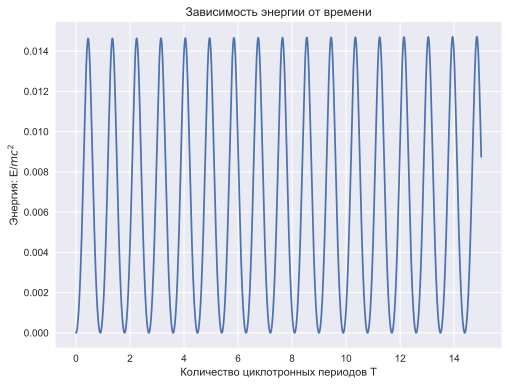

In [29]:
plt.figure(figsize=(8,6))
plt.title('Зависимость энергии от времени')
plt.xlabel('Количество циклотронных периодов T')
plt.ylabel('Энергия: E/$mc^2$')
plt.plot(t, Enegrie)

Text(0, 0.5, 'y, см')

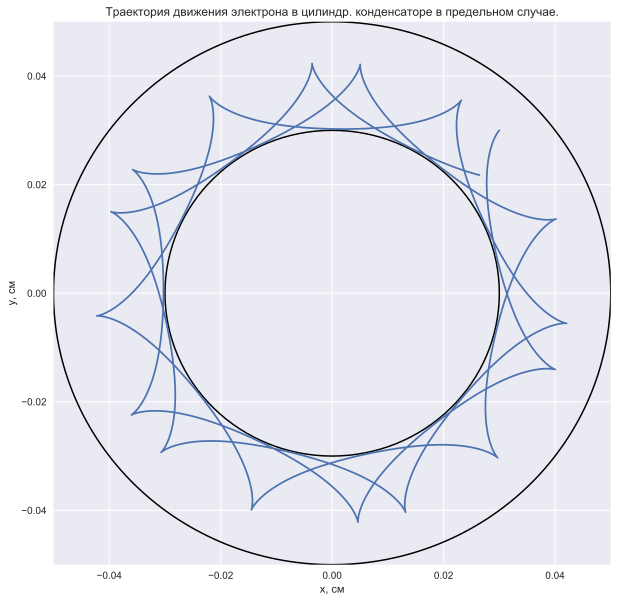

In [30]:
circle1 = plt.Circle((0, 0), 0.05, color='black', fill=False, linewidth=1.5)
circle2= plt.Circle((0, 0), 0.03, color='black', fill=False, linewidth=1.5)

fig, ax = plt.subplots(figsize=(10, 10)) 

ax.add_artist(circle1)
ax.add_artist(circle2)

plt.plot(coordinate.T[0], coordinate.T[1])
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)

plt.title('Траектория движения электрона в цилиндр. конденсаторе в предельном случае.')
plt.xlabel('x, см')
plt.ylabel('y, см')

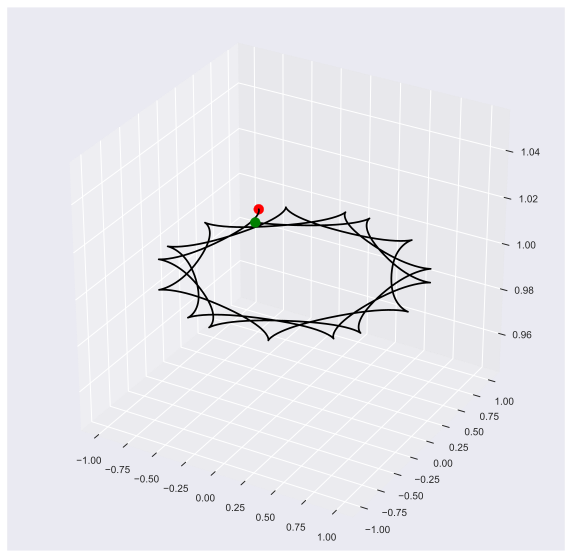

In [31]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter(
    coordinate.T[0][0]/max(coordinate.T[0], key=abs),
    coordinate.T[1][0]/max(coordinate.T[1], key=abs),
    coordinate.T[2][0]/max(coordinate.T[2], key=abs),
    c='r', marker='o', s=100
)
ax.scatter(
    coordinate.T[0][-1]/max(coordinate.T[0], key=abs),
    coordinate.T[1][-1]/max(coordinate.T[1], key=abs),
    coordinate.T[2][-1]/max(coordinate.T[2], key=abs),
    c='g', marker='o', s=100
)

ax.plot3D(
    coordinate.T[0]/max(coordinate.T[0], key=abs),
    coordinate.T[1]/max(coordinate.T[1], key=abs),
    coordinate.T[2]/(max(coordinate.T[2], key=abs)),
    'black')

In [32]:
func = cilind_drift(vx0=2e7, vy0=2e7, n=15, U=350, N=100000, Bz0=0.02)

## Начальные условия: 
### $x_0 = 0.03 см.,$

### $y_0 = 0.03 см.,$
   
### $U = 350,$
   
### $v_{x0} = 2\cdot10^7 \frac{м}{с},$
   
### $v_{y0} = 2\cdot10^7 \frac{м}{с}$

### $B_{z0} = 0.02 Tл$


### Количество периодов = 15.

In [33]:
coordinate = func[0]
t = func[1]

Enegrie = func[2]/(9.1e-31 * (3e8)**2)

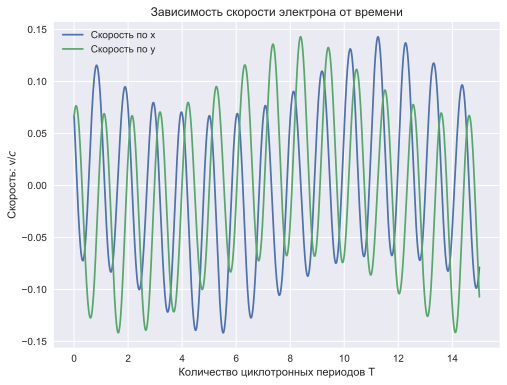

In [34]:
plt.figure(figsize=(8,6))
V = np.array(func[6])
plt.plot(t, V.T[0]/3e8)
plt.plot(t, V.T[1]/3e8)

plt.title('Зависимость скорости электрона от времени')
plt.xlabel('Количество циклотронных периодов T')
plt.ylabel('Cкорость: v/$c$')
plt.legend(['Скорость по х', 'Скорость по у'])

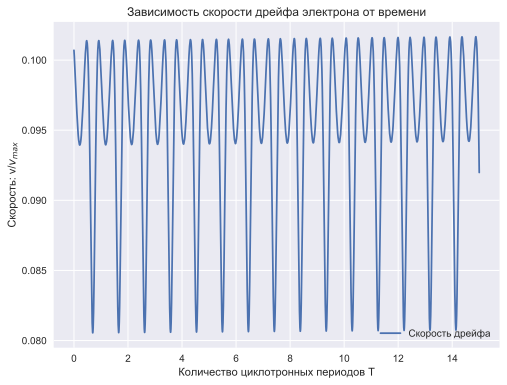

In [35]:
plt.figure(figsize=(8,6))

V_drift = np.array(func[5])
plt.plot(t, np.sqrt((V_drift.T[0]/3e8)**2+(V_drift.T[1]/3e8)**2))

plt.title('Зависимость скорости дрейфа электрона от времени')
plt.xlabel('Количество циклотронных периодов T')
plt.ylabel('Cкорость: v/$v_{max}$')
plt.legend(['Скорость дрейфа'], loc=4)

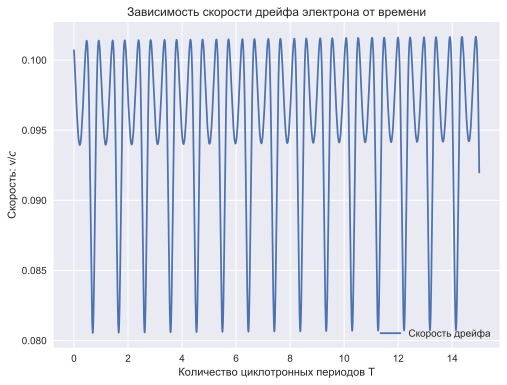

In [36]:
plt.figure(figsize=(8,6))
V_drift = np.array(func[5])
plt.plot(t, np.sqrt((V_drift.T[0]/3e8)**2+(V_drift.T[1]/3e8)**2))

plt.title('Зависимость скорости дрейфа электрона от времени')
plt.xlabel('Количество циклотронных периодов T')
plt.ylabel('Cкорость: v/$с$')
plt.legend(['Скорость дрейфа'], loc=4)

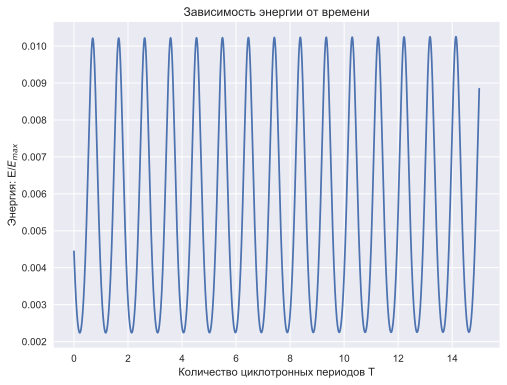

In [37]:
plt.figure(figsize=(8,6))
plt.title('Зависимость энергии от времени')
plt.xlabel('Количество циклотронных периодов T')
plt.ylabel('Энергия: E/$E_{max}$')
plt.plot(t, Enegrie)

Text(0, 0.5, 'y, см')

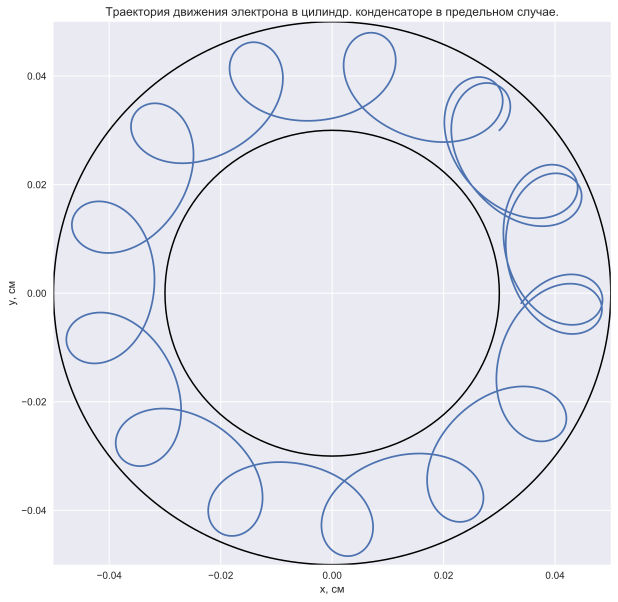

In [38]:
circle1 = plt.Circle((0, 0), 0.05, color='black', fill=False, linewidth=1.5)
circle2 = plt.Circle((0, 0), 0.03, color='black', fill=False, linewidth=1.5)

fig, ax = plt.subplots(figsize=(10, 10)) 

ax.add_artist(circle1)
ax.add_artist(circle2)

plt.plot(coordinate.T[0], coordinate.T[1])
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)

plt.title('Траектория движения электрона в цилиндр. конденсаторе в предельном случае.')
plt.xlabel('x, см')
plt.ylabel('y, см')

In [39]:
#! jupyter nbconvert --to html Chisl4.ipynb